In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matrixprofile as mp
import random
import time
import os
from matplotlib.patches import Rectangle

In [3]:
def plot_ddos(df: pd.DataFrame):
    xAxis = list(range(len(df)))
    yAxis = df["Label"].to_list()
    # Create a figure
    fig = plt.figure(figsize=(25,15))
    # Add a subplot
    ax = fig.add_subplot()

    ax.plot(xAxis, yAxis)
    rect = Rectangle((7200, 0), 300, 1, facecolor='lightgreen')
    ax.add_patch(rect)
    rect = Rectangle((3600*3 + 7200 +280, 0), 300, 1, facecolor='lightgreen')
    ax.add_patch(rect)
    plt.ylabel('Label')
    plt.xlabel('Minute')
    plt.title('Network Traffic')
    plt.show()

In [4]:
def upload_dataset_with_time(path:str):
    startingT = time.perf_counter()
    veriseti = pd.read_csv(path, low_memory=False)
    endingT = time.perf_counter()
    print(f"Dataset is loaded in {endingT - startingT} seconds")
    return veriseti

data_path = '../verisetleri/ddos_dataset_on_seconds.csv'
syn_benign_df = upload_dataset_with_time(data_path)

Dataset is loaded in 0.12398954199999945 seconds


In [5]:
ntp_path = '../verisetleri/ntp_by_seconds_data.csv'
ntp_df = upload_dataset_with_time(ntp_path)

Dataset is loaded in 0.019620000000000637 seconds


In [6]:
def label_ddos(label:int):
    if label > 20:
        return 1
    else:
        return 0
ntp_df["Label"] = ntp_df["Label"].apply(lambda x: label_ddos(x))

In [7]:
ddos_ntp = ntp_df[ntp_df["Label"] == 1].sample(524).reset_index(drop=True)

In [8]:
ddos_ntp = ddos_ntp[[*(syn_benign_df.columns)]]

In [35]:
syn_slice_1 = syn_benign_df.iloc[:12000, :].copy()
syn_slice_2 = syn_benign_df.iloc[12000:, :].copy()
merged_df = pd.concat([syn_slice_1, ddos_ntp ,syn_slice_2, ddos_ntp], axis = 0).reset_index(drop=True)

In [36]:
df = merged_df.copy()

In [37]:
y = df[["Label"]]
X = df.drop(["Label"], axis = 1)

In [38]:
feature_map = {i : feat_name for i, feat_name in enumerate(X.columns)}
X.columns = list(range(0, len(X.columns)))

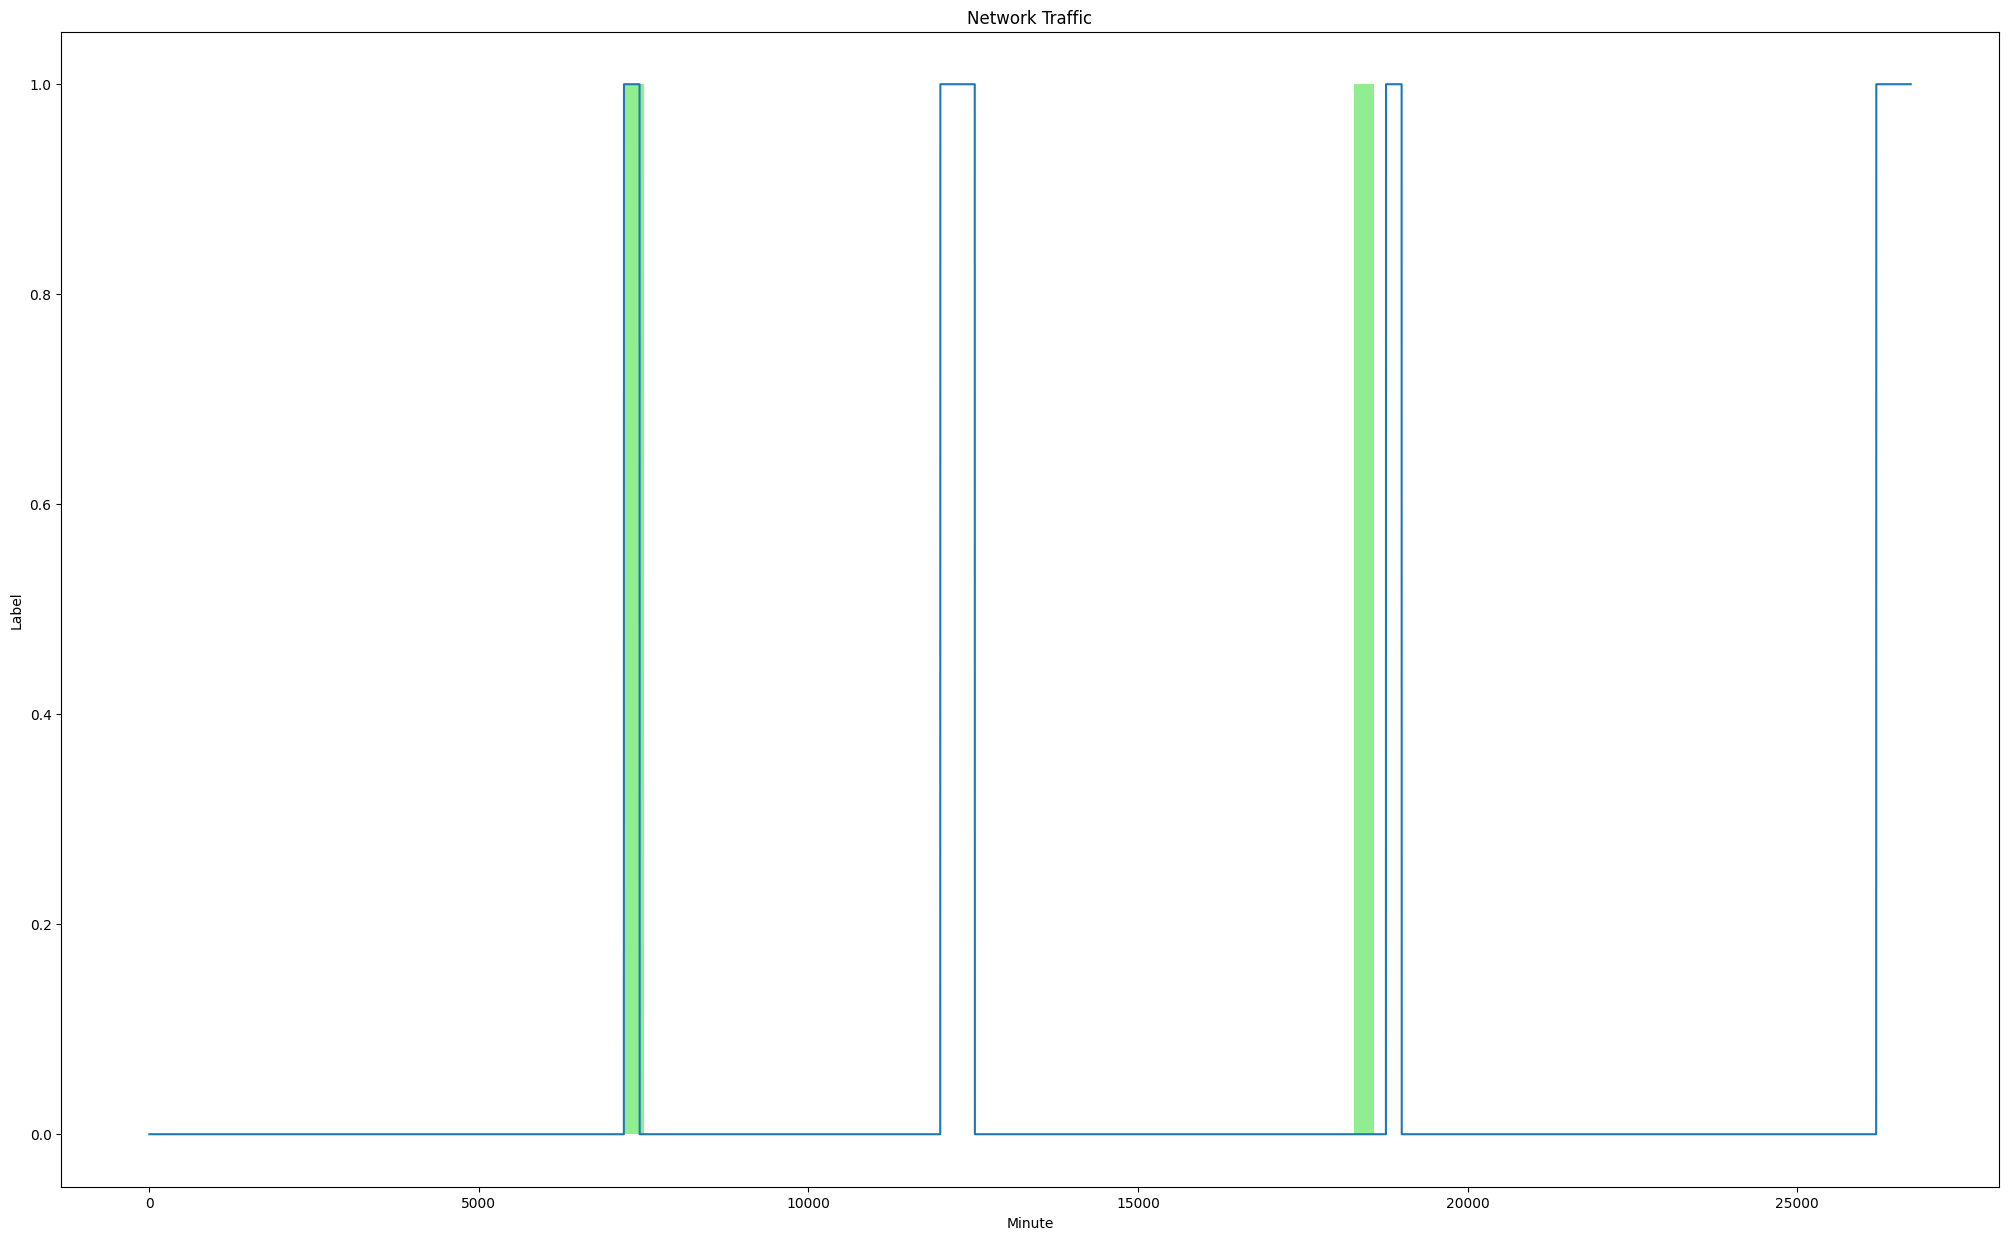

In [39]:
plot_ddos(df.copy())

In [42]:
import mp_genetic_utils
mp_genetic_utils.MatrixProfileManager.global_df = df.copy()
f1_score_list = []
for i in range(0,len(df.columns) - 1):
    mp_manager = mp_genetic_utils.MatrixProfileManager(pd.DataFrame(df.iloc[:,i]),60, 1500)
    f1_score_list.append(mp_manager.calculate_cost()[1])

print(sorted(f1_score_list, reverse=True)[:3])

[0.8915343915343915, 0.8725945587259456, 0.8624338624338623]


In [43]:
mp_genetic_utils.MatrixProfileManager.threshold = 1.5
mp_genetic_utils.MatrixProfileManager.THRESHOLD_BASE_ACTIVE = True

f1_score_list = []
for i in range(0,len(df.columns) - 1):
    mp_mng = mp_genetic_utils.MatrixProfileManager(pd.DataFrame(df.iloc[:, i]), 60, 10)
    f1_score_list.append((i, mp_manager.calculate_threshold_based_cost()[1]))

print(sorted(f1_score_list,key=lambda x:x[1], reverse=True)[:3])

[(0, 0.13939393939393938), (1, 0.13939393939393938), (2, 0.13939393939393938)]


In [16]:
df.head(3)

,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,Label
0,48909.0,72193.0,5278085.0,138620706.0,1090202.0,104099.0,283164.406577,313470.988649,3213141.0,260504.0,...,1.003700e+06,1.523404e+06,7.184094e+08,3.907212e+07,99474.0,3394840.0,610452.099664,795468.719934,9.985600e+08,0
1,39524.0,36679.0,3508037.0,15398436.0,771278.0,110393.0,227406.836426,210941.501413,1933882.0,249326.0,...,8.039800e+05,8.288560e+05,7.930575e+08,1.786188e+07,107214.0,2063759.0,436648.922880,530980.392343,3.077283e+08,0
2,34521.0,31317.0,3365823.0,12264572.0,755249.0,98726.0,232068.791277,220896.861116,1718078.0,221093.0,...,-2.550454e+10,-2.550455e+10,1.127396e+09,1.957448e+07,94632.0,1893322.0,417656.758716,505439.642372,2.923933e+08,0


In [17]:
X = df.drop(["Label"], axis = 1)
y = df[["Label"]]

In [18]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [19]:
pd.DataFrame(X_scaled).head(3)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.440478,1.371935,0.054361,1.453906,1.154822,-0.091372,0.282790,1.171502,1.294909,0.529311,...,0.0,0.031558,0.687065,-0.295635,1.402510,-0.099691,1.321469,0.944980,1.211633,1.435006
1,-0.156337,-0.418725,-0.175012,-0.646172,-0.405127,-0.023763,-0.238013,-0.459638,-0.341822,0.303138,...,0.0,0.031558,0.687007,-0.213815,-0.685299,-0.016868,-0.398693,-0.358431,-0.334345,-0.605117
2,-0.474490,-0.689084,-0.193441,-0.699583,-0.483530,-0.149088,-0.194468,-0.301259,-0.617929,-0.268123,...,0.0,-0.000047,-1.455681,0.152649,-0.516721,-0.151504,-0.618949,-0.500860,-0.483635,-0.650404


In [20]:
features = X_scaled.T
cov_matrix = np.cov(features)

In [21]:
cov_matrix.shape

(39, 39)

In [22]:
for i in range(4):
    #diagonal varyanslar 1
    print(cov_matrix[i,i])

1.0000381693957785
1.0000381693957776
1.0000381693957776
1.0000381693957758


In [23]:
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([15.18179666, 10.02833926,  4.5781487 ,  3.40843432,  1.52023517])

In [25]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), "\n", explained_variances)

0.9999999999999999 
 [0.4217004777717349, 0.27855434708504995, 0.12716594336525222, 0.09467511729542646, 0.042227142825839295, 0.02673437973826432, 0.00821964512476729, 0.0003879647464779741, 0.0002435373095386128, 4.673360550259921e-05, 2.2470950336738608e-05, 1.1122676445512842e-05, 7.74498856533824e-06, 2.031115710493383e-06, 4.855604115183057e-07, 2.6903478990133033e-07, 2.0525991168368926e-07, 1.4349971530087098e-07, 8.753679937951936e-08, 6.31179463006673e-08, 3.4334875633997735e-08, 2.851684221611067e-08, 8.338292451390009e-09, 4.410028360654422e-09, 3.744390690535103e-09, 3.522122718203216e-09, 1.5601306763834915e-09, 1.104501503771496e-09, 7.570946736651438e-10, 4.1246029242095297e-10, 2.61969600276639e-10, 1.3980777917932773e-11, 3.432352524383394e-11, 1.5808867467475683e-10, 1.0279521187051057e-10, 1.1961711290017e-10, 0.0, 0.0, 0.0]


In [27]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=["PC1"])
res["PC2"] = projected_2
res["Y"] = y
res.head()

,PC1,PC2,Y
0,2.759567,3.456261,0
1,0.995148,-2.351385,0
2,-1.853372,-1.268864,0
3,2.759567,3.456261,0
4,0.995148,-2.351385,0
